In [1]:
# Set Working Directory
import os
os.chdir('..')

In [2]:
# Load Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
There are two data files included in this competition: train and test. The training data includes both features and labels while the test data only includes features. For EDA, I will use the training data because it includes both features and labels.

In [3]:
# Load testing data
data_test = pd.read_csv('data/TestData.csv', index_col=0)

# Load training data
data = pd.read_csv('data/TrainingData.csv', index_col=0)
print(data.shape)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(400277, 25)


# Data Types
Below are the datatypes for the features based on the [information](https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/page/86/) provided by the competition.

Features:

* FTE - numerical
* Facility_or_Department - text
* Function_Description - text
* Fund_Description - text
* Job_Title_Description - text
* Location_Description - text
* Object_Description - text
* Position_Extra - text
* Program_Description - text
* SubFund_Description - text
* Sub_Object_Description - text
* Text_1 - text
* Text_2 - text
* Text_3 - text
* Text_4 - text
* Total - numerical

All labels are categorical. Below are the number of classes for each label.

In [4]:
# List of features
features = ['FTE', 
            'Facility_or_Department', 
            'Function_Description', 
            'Fund_Description', 
            'Job_Title_Description', 
            'Location_Description', 
            'Object_Description', 
            'Position_Extra', 
            'Program_Description', 
            'SubFund_Description', 
            'Sub_Object_Description', 
            'Text_1', 
            'Text_2', 
            'Text_3', 
            'Text_4', 
            'Total']

# List of labels
labels = ['Function', 
          'Object_Type', 
          'Operating_Status', 
          'Position_Type', 
          'Pre_K', 
          'Reporting', 
          'Sharing', 
          'Student_Type', 
          'Use']

In [5]:
# Display data types for features
data[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 16 columns):
FTE                       126071 non-null float64
Facility_or_Department    53886 non-null object
Function_Description      342195 non-null object
Fund_Description          202877 non-null object
Job_Title_Description     292743 non-null object
Location_Description      162054 non-null object
Object_Description        375493 non-null object
Position_Extra            264764 non-null object
Program_Description       304660 non-null object
SubFund_Description       306855 non-null object
Sub_Object_Description    91603 non-null object
Text_1                    292285 non-null object
Text_2                    88217 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Total                     395722 non-null float64
dtypes: float64(2), object(14)
memory usage: 51.9+ MB


In [6]:
# Display data types for labels
data[labels].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 9 columns):
Function            400277 non-null object
Object_Type         400277 non-null object
Operating_Status    400277 non-null object
Position_Type       400277 non-null object
Pre_K               400277 non-null object
Reporting           400277 non-null object
Sharing             400277 non-null object
Student_Type        400277 non-null object
Use                 400277 non-null object
dtypes: object(9)
memory usage: 30.5+ MB


In [7]:
# Convert data types to category
data[labels] = data[labels].astype('category')
data[labels].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 9 columns):
Function            400277 non-null category
Object_Type         400277 non-null category
Operating_Status    400277 non-null category
Position_Type       400277 non-null category
Pre_K               400277 non-null category
Reporting           400277 non-null category
Sharing             400277 non-null category
Student_Type        400277 non-null category
Use                 400277 non-null category
dtypes: category(9)
memory usage: 6.5 MB


# Number of classes in each label

Below are the number of classes for each label based on the competition [information](https://www.drivendata.org/competitions/46/box-plots-for-education-reboot/page/86/).

* Function - 37
* Object_Type - 11
* Operating_Status - 3
* Position_Type - 25
* Pre_K - 3
* Reporting - 3
* Sharing - 5
* Student_Type - 9
* Use - 8

In [8]:
# Verify number of classes in each label
for label in labels:
    n_classes = data[label].nunique()
    print(label, n_classes)

Function 37
Object_Type 11
Operating_Status 3
Position_Type 25
Pre_K 3
Reporting 3
Sharing 5
Student_Type 9
Use 8


# Distribution of numerical features
The two numerical features are FTE and Total.

### FTE

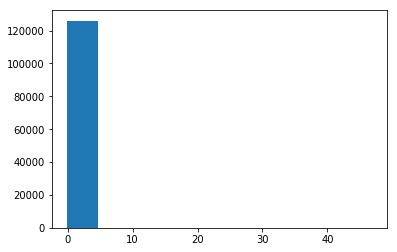

count    126071.000000
mean          0.426794
std           0.573576
min          -0.087551
25%           0.000792
50%           0.130927
75%           1.000000
max          46.800000
Name: FTE, dtype: float64


In [49]:
# Histogram of FTE
plt.hist(data['FTE'].dropna())
plt.show()

# Observe distribution for FTE
print(data['FTE'].describe())

For FTE, I expected the values to be between 0 and 1 since it represents the percentage of full-time that an employee works. However, the largest value is 46.8.

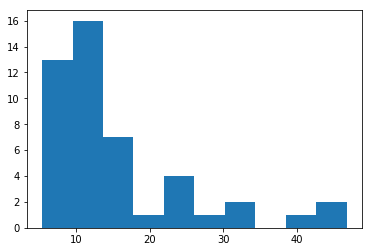

(47, 16)
         FTE Facility_or_Department  \
332375  17.7                    NaN   
122833   7.6                    NaN   
137214  10.2                    NaN   
34918    9.6                    NaN   
150286  13.0                    NaN   
362251  34.2                    NaN   
425376  24.6                    NaN   
160827   6.0                    NaN   
325585   6.6                    NaN   
131081  11.4                    NaN   

                                 Function_Description   Fund_Description  \
332375                                            NaN  Central Cafeteria   
122833                                            NaN  Central Cafeteria   
137214                                            NaN  Central Cafeteria   
34918                                             NaN  Central Cafeteria   
150286           Care and Upkeep of Building Services            General   
362251                                            NaN  Central Cafeteria   
425376                       

In [36]:
# Histogram of FTE > 5
plt.hist(data.loc[data['FTE'] > 5, 'FTE'].dropna())
plt.show()


# Observe features for FTE > 5
print(data.loc[data['FTE'] > 5, features].shape)
print(data.loc[data['FTE'] > 5, features].sample(10))

# Observe labels for FTE > 5
print(data.loc[data['FTE'] > 5, labels].sample(10))

Most records where FTE > 5 had Fund_Description = Central Cafetaria. One possible explanation is that there are multiple cafetaria staff members, and FTE is capturing the total hours works by the staff members relative to the 40-hour work week of a single full-time worker.

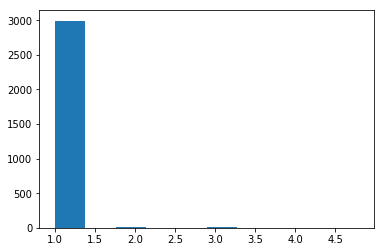

(3015, 16)
             FTE Facility_or_Department          Function_Description  \
12216   1.000024                    NaN  ELA E-TEACHING SHELTERED ENG   
254851  1.016338                    NaN                   NON-PROJECT   
227833  1.034722                    NaN                  CARL PERKINS   
101724  1.000028                    NaN  ELA E-TEACHING SHELTERED ENG   
441792  1.000028                    NaN    SPECIAL ED. - SEVERE NEEDS   
167198  1.002519                    NaN                   NON-PROJECT   
35593   1.000025                    NaN                     IDEA ARRA   
292223  1.012224                    NaN                   NON-PROJECT   
201426  1.000029                    NaN                   NON-PROJECT   
165131  1.000027                    NaN  ELA E-TEACHING SHELTERED ENG   

       Fund_Description        Job_Title_Description Location_Description  \
12216               NaN         Teacher, Elementary                   NaN   
254851              NaN   Teach

In [50]:
# Histogram of FTE between 1 and 5
plt.hist(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 5), 'FTE'].dropna())
plt.show()

# Observe features for FTE between 1 and 5
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 5), features].shape)
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 5), features].sample(10))

# Observe labels for FTE between 1 and 5
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 5), labels].sample(10))

Based on a few samples, it looked like the majority of records with FTE between 1 and 5 have FTE very close to 1. I split the data into records where FTE is between 1 and 1.25 and between 1.25 and 5.

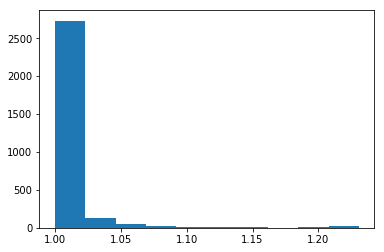

(2988, 16)
             FTE Facility_or_Department            Function_Description  \
433874  1.000023                    NaN                     NON-PROJECT   
406629  1.007453                    NaN         SPECIAL PROGRAM FUNDING   
242784  1.000027                    NaN    SPECIAL ED - EARLY CHILDHOOD   
313063  1.000025                    NaN                     NON-PROJECT   
191618  1.000025                    NaN                     NON-PROJECT   
405201  1.001984                    NaN      SPECIAL ED. - SEVERE NEEDS   
410433  1.002381                    NaN  STATE ELPA (ENG LANG PROF ACT)   
444876  1.000029                    NaN    ELA E-TEACHING SHELTERED ENG   
75232   1.000030                    NaN     SPECIAL ED. - MILD/MODERATE   
43065   1.003651                    NaN     SPECIAL ED. - MILD/MODERATE   

       Fund_Description        Job_Title_Description Location_Description  \
433874              NaN  Training & Dvlpmnt Speclst     FACILITY SERVICES   
406629   

In [51]:
# Histogram of FTE between 1 and 1.25
plt.hist(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 1.25), 'FTE'].dropna())
plt.show()

# Observe features for FTE between 1 and 1.25
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 1.25), features].shape)
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 1.25), features].sample(10))

# Observe labels for FTE between 1 and 5
print(data.loc[(data['FTE'] > 1.0) & (data['FTE'] < 1.25), labels].sample(10))

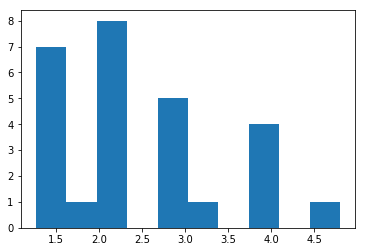

(27, 16)
             FTE Facility_or_Department  \
418440  2.060000                    NaN   
281239  2.000000                    NaN   
31876   2.000000                    NaN   
311586  2.000000                    NaN   
48681   2.000000                    NaN   
377132  3.000000                    NaN   
87513   1.352778                    NaN   
362443  3.000000                    NaN   
13065   4.000000                    NaN   
76032   1.390625                    NaN   

                                     Function_Description  \
418440  Food Purchasing, Preparation and Dispensing Se...   
281239                            Service Area Direction*   
31876       Classroom Support - Special Education Aides *   
311586       Other Improvements of Instruction Services *   
48681       Classroom Support - Special Education Aides *   
377132                                         Elementary   
87513                                         NON-PROJECT   
362443               Occupati

In [52]:
# Histogram of FTE between 1.25 and 5
plt.hist(data.loc[(data['FTE'] > 1.25) & (data['FTE'] < 5), 'FTE'].dropna())
plt.show()

# Observe features for FTE between 1.25 and 5
print(data.loc[(data['FTE'] > 1.25) & (data['FTE'] < 5), features].shape)
print(data.loc[(data['FTE'] > 1.25) & (data['FTE'] < 5), features].sample(10))

# Observe labels for FTE between 1.25 and 5
print(data.loc[(data['FTE'] > 1.25) & (data['FTE'] < 5), labels].sample(10))

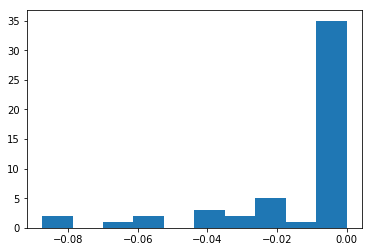

(51, 16)
                 FTE Facility_or_Department            Function_Description  \
301883 -6.793579e-02                    NaN      SPECIAL ED. - SEVERE NEEDS   
144109 -4.336809e-19                    NaN                     NON-PROJECT   
253483 -1.630427e-02                    NaN                     NON-PROJECT   
281311 -8.163265e-03                    NaN                     NON-PROJECT   
145588 -1.040834e-17                    NaN                     NON-PROJECT   
198366 -3.886916e-02                    NaN                     NON-PROJECT   
87981  -2.168404e-19                    NaN                     NON-PROJECT   
335091 -3.998406e-03                    NaN  OPERATION OF PLANT               
33829  -6.122449e-02                    NaN                     NON-PROJECT   
46366  -6.522883e-03                    NaN                     NON-PROJECT   

                      Fund_Description           Job_Title_Description  \
301883                             NaN     Teac

In [57]:
# Histogram of FTE < 0
plt.hist(data.loc[data['FTE'] < 0, 'FTE'].dropna())
plt.show()

# Observe features for FTE < 0
print(data.loc[data['FTE'] < 0, features].shape)
print(data.loc[data['FTE'] < 0, features].sample(10))

# Observe labels for FTE < 0
print(data.loc[data['FTE'] < 0, features].sample(10))

### Total

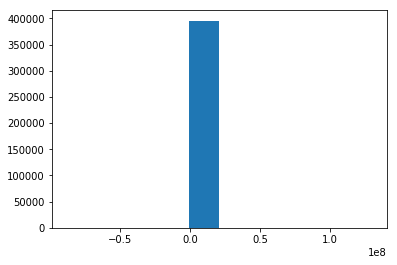

count    3.957220e+05
mean     1.310586e+04
std      3.682254e+05
min     -8.746631e+07
25%      7.379770e+01
50%      4.612300e+02
75%      3.652662e+03
max      1.297000e+08
Name: Total, dtype: float64


In [53]:
# Histogram of Total
plt.hist(data['Total'].dropna())
plt.show()

# Observe distribution for Total
print(data['Total'].describe())

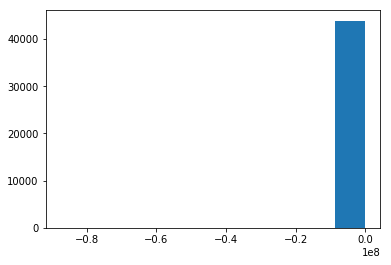

(43870, 16)
        FTE Facility_or_Department  \
143685  NaN                    NaN   
330932  NaN                    NaN   
150603  NaN                    NaN   
133766  NaN                    NaN   
169622  NaN                    NaN   
139547  NaN                    NaN   
395450  NaN                    NaN   
207021  NaN                    NaN   
84068   NaN                    NaN   
131565  NaN                    NaN   

                                     Function_Description  \
143685                                        NON-PROJECT   
330932                         Other Community Services *   
150603                                        NON-PROJECT   
133766                                        NON-PROJECT   
169622                                        NON-PROJECT   
139547  Instruction And Curriculum Development Services *   
395450                              Disadvantaged Youth *   
207021                                        NON-PROJECT   
84068               

In [65]:
# Histogram of Total < 0
plt.hist(data.loc[data['Total'] < 0, 'Total'].dropna())
plt.show()

# Observe features for Total < 0
print(data.loc[data['Total'] < 0, features].shape)
print(data.loc[data['Total'] < 0, features].sample(10))

# Observe labels for Total < 0
print(data.loc[data['Total'] < 0, labels].sample(10))

Observations:

* FTE is generally NaN for Total < 0
* Many grants (revenue) items
* Many labels are "NO_LABEL"